# Implementation of TF-IDF(Term Frequency - Inverse Document Frequency)

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import re

### Intuition
<ol>
    <li><b>Term Frequency (TF): </b>TF measures the frequency of a term (word) in a document. It is calculated by dividing the number of times a word occurs in a document by the total number of words in that document. </li>
        <ul>
            <li>The intuition behind TF is simple: the more a word appears in a document, the more relevant it is to the document’s content.</li>
            <li>Mathematically, the Term Frequency (TF) of a term t in a document d is given by:<br>
            TF(t, d) = (Number of occurrences of term t in document d) / (Total number of terms in document d)
        </ul>  
    <li><b>Inverse Document Frequency (IDF): </b>While TF tells us about the importance of a term within a document, IDF reveals its significance in the entire corpus. IDF measures how rare or common a term is across all the documents in the collection. 
        <ul>
            <li>Rare words that occur in only a few documents are given higher IDF scores, while common words that appear in many documents have lower IDF scores.
            <li>The Inverse Document Frequency (IDF) of a term t in a corpus D (a collection of documents) is calculated as follows:<br>
                IDF(t, D) = log_e(Total number of documents in the corpus D / Number of documents containing term t)</li>
            <li>By taking the logarithm of the ratio, we ensure that IDF values remain proportional and do not become too large.</li>
        </ul>
    <li><b>TF-IDF Calculation:</b> The final TF-IDF score for a term t in a document d is obtained by multiplying its TF and IDF values:<br>
        TF-IDF(t, d, D) = TF(t, d) * IDF(t, D)

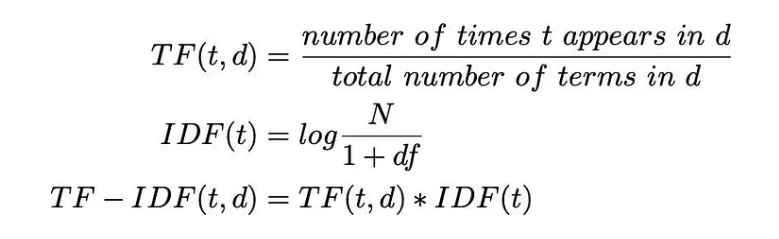

### Advantage of TF-IDF:
<li>This process is intuitive</li>
<li>Word count/ vacab of the corpus is fixed</li>
<li>Word importance is captured</li>

### Disadvantage of TF-IDF:
<li>Sparsity exists</li>
<li>If there is a new word added in the test data, it'll be ignored</li>

In [7]:
#Importing data
df = pd.read_csv('spam.csv', encoding='latin-1')
df.drop(columns=['Unnamed: 2','Unnamed: 3',	'Unnamed: 4'], inplace = True)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Preprocessing using Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.corpus import stopwords

In [11]:
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ', df['message'][i])
    review = review.lower()
    review = review.split()
    [lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
# Extracting Features using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2), max_features=2500)
X = tfidf.fit_transform(corpus).toarray()
features_ext = pd.DataFrame(X, columns=tfidf.get_feature_names_out())
features_ext.head()

,abiola,able,able to,about,about me,about smiling,about the,about this,about you,abt,...,your number,your phone,your prize,your reply,yours,yours call,yourself,yr,yrs,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
features_ext.max()

abiola        0.435562
able          0.480455
able to       0.486297
about         0.495642
about me      0.456323
                ...   
yours call    0.354173
yourself      0.902789
yr            0.542965
yrs           0.424187
yup           1.000000
Length: 2500, dtype: float64

Although the feature matrix is sparse, We can notice that this method is able to capture the word importance in the given corpus.

Note: Word that is frequently found in all the documents is given low IDF value and the words that are rarely found are given high IDF value